In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

png_img = cv2.imread("/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data/CN055_LS_42_M/OD/0-6/0/Horizontal/Image.png", cv2.IMREAD_UNCHANGED)
print("PNG shape:", png_img.shape, "dtype:", png_img.dtype)

H, W = 4096, 850

PNG shape: (4096, 850, 3) dtype: uint8


In [2]:
# segmentation = np.fromfile("/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data/CN055_LS_42_M/OD/0-6/0/Horizontal/Segmentation.bin", dtype=np.uint8)
segmentation = np.fromfile("/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data/CN029_FK_24_M/OS/6-0D/0/Vertical/Segmentation.bin", dtype=np.uint8)
# segmentation = np.fromfile("data2/Vertical/Segmentation.bin", dtype=np.uint8)
print("Segmentation size:", segmentation.size, segmentation.dtype,
      "min:", segmentation.min(), "max:", segmentation.max())
segmentation= segmentation[:H*W].reshape(W, H).T
print("Segmentation shape:", segmentation.shape, "dtype:", segmentation.dtype,
      "unique classes:", np.unique(segmentation))

Segmentation size: 3481608 uint8 min: 0 max: 255
Segmentation shape: (4096, 850) dtype: uint8 unique classes: [  0   3  16  82 255]


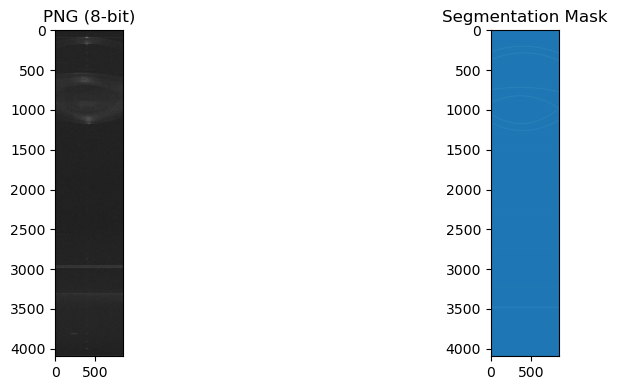

In [3]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title("PNG (8-bit)")
plt.imshow(png_img)
# plt.axis("off")

plt.subplot(1,2,2)
plt.title("Segmentation Mask")
plt.imshow(segmentation, cmap="tab20")  # colorful labels
# plt.axis("off")

plt.tight_layout()
plt.show()

Segmentation shape: (4096, 850) dtype: uint8 unique classes: [  0   3  16  82 255]
Detected 7 layer segments (900, 850), int32,
 labels: [0 1 2 3 4 5 6 7]  
Layer 1: processing 850 points
Layer 1: extracted 850 boundary points
Layer 2: processing 850 points
Layer 2: extracted 850 boundary points
Layer 7: processing 850 points
Layer 7: extracted 850 boundary points


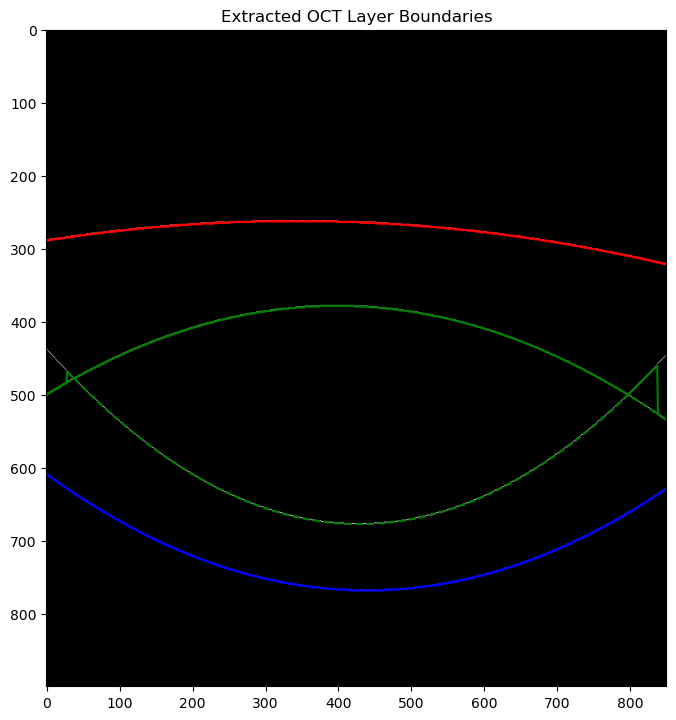

In [9]:
H, W = 4096, 850
data_root = "/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data"  # root dataset folder
png_img = cv2.imread(data_root +"/CN055_LS_42_M/OD/0-6/0/Horizontal/Image.png", cv2.IMREAD_UNCHANGED)

segmentation = np.fromfile(data_root +"/CN043_DJ_18_M/OD/6-0D/2/Horizontal/Segmentation.bin", dtype=np.uint8)
segmentation= segmentation[:H*W].reshape(W, H).T
print("Segmentation shape:", segmentation.shape, "dtype:", segmentation.dtype,
      "unique classes:", np.unique(segmentation))
segmentation =segmentation[500:1400, :850]  # crop to region of interest

binary_img = (segmentation > 225).astype(np.uint8)

# Find connected components (each continuous layer)
num_labels, labels = cv2.connectedComponents(binary_img)
print(f"Detected {num_labels-1} layer segments {labels.shape}, "
      f"{labels.dtype},\n labels: {np.unique(labels)}  ")

# ===========================================
layer_curves = []  # store curves for each layer

for label in range(1, num_labels):  # skip background (0)
    coords = np.column_stack(np.where(labels == label))  # (y, x)
    x_coords = np.unique(coords[:,1])  # all columns for this region
    
    if len(x_coords) < 840:  # ignore small/short components
    # print(f"Layer {label}: ignored (only {len(x_coords)} points)")
        continue
    print(f"Layer {label}: processing {len(x_coords)} points")
    # print(coords)
    top_curve = []
    bottom_curve = []
    
    for x in x_coords:
        y_vals = coords[coords[:,1] == x][:,0]  # all y in this column
        top_curve.append((x, y_vals.min()))
        bottom_curve.append((x, y_vals.max()))
    
    layer_curves.append((top_curve, bottom_curve))
    print(f"Layer {label}: extracted {len(x_coords)} boundary points")
# ====================================================
# layer_info = []
# for label in range(1, num_labels):
#     coords = np.column_stack(np.where(labels == label))
#     centroid_y = coords[:,0].mean()
#     layer_info.append((label, centroid_y))

# # Sort by vertical position (top to bottom)
# layer_info.sort(key=lambda x: x[1])

# print("Layer order (top to bottom):")
# for i, (label, cy) in enumerate(layer_info, 1):
#     print(f"Layer {i}: Label={label}, centroid_y={cy:.1f}")

# =================================================
# Visualize layers with different colors
plt.figure(figsize=(8, 12))
plt.imshow(binary_img, cmap='gray')

colors = ['r','g','b','y','c','m']  # cycle colors for layers
for i, (top, bottom) in enumerate(layer_curves):
    color = colors[i % len(colors)]
    plt.plot([p[0] for p in top], [p[1] for p in top], color+'-', linewidth=1.5, label=f'Layer {i+1} Top')
    plt.plot([p[0] for p in bottom], [p[1] for p in bottom], color+'--', linewidth=1.5, label=f'Layer {i+1} Bottom')

# plt.legend()
plt.title("Extracted OCT Layer Boundaries")
plt.show()


In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
H, W = 4096, 850
data_root = "/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data" 
# segmentation = np.fromfile(data_root +"/CN043_DJ_18_M/OD/6-0D/6/Horizontal/Segmentation.bin", dtype=np.uint8)

segmentation = np.fromfile(data_root +"/CN060_ZK_33_F/OD/6-0D/6/Horizontal/Segmentation.bin", dtype=np.uint8)

segmentation= segmentation[:H*W].reshape(W, H).T
print("Segmentation shape:", segmentation.shape, "dtype:", segmentation.dtype,
      "unique classes:", np.unique(segmentation))
segmentation =segmentation[:1400, :850]  # crop to region of interest

binary_img = (segmentation > 225).astype(np.uint8)
print(np.unique(binary_img, return_counts=True))
print("Segmentation shape:", segmentation.shape)

Segmentation shape: (4096, 850) dtype: uint8 unique classes: [  0   3  16  82 255]
(array([0, 1], dtype=uint8), array([1184050,    5950]))
Segmentation shape: (1400, 850)


Segment 3 horizontal range: x5_start = 26 , x5_end = 800
Unique classes in segmentation: (array([0, 1, 2, 3], dtype=uint8), array([746075,  64117, 223350, 156458]))


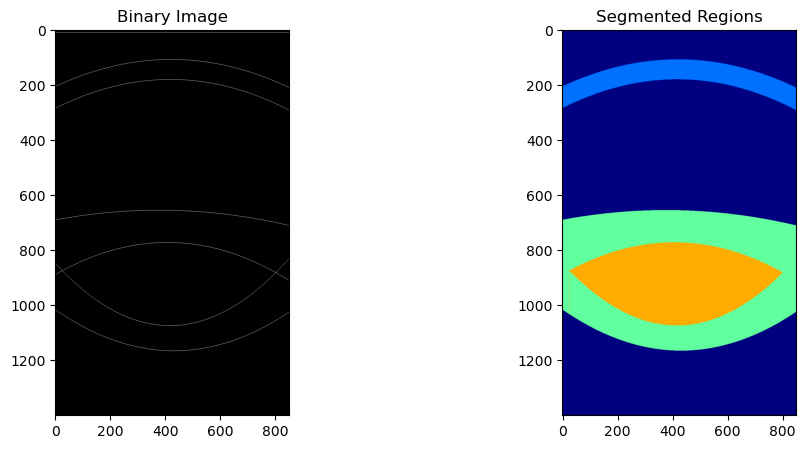

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

H, W = 4096, 850
data_root = "/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data" 
# --- Load binary image from segmentation file ---
segmentation = np.fromfile(
    f"{data_root}/CN043_DJ_18_M/OD/6-0D/4/Horizontal/Segmentation.bin", dtype=np.uint8
)
segmentation = segmentation[:H*W].reshape(W, H).T
segmentation = segmentation[:1400, :850]  # crop if needed

binary_img = (segmentation > 225).astype(np.uint8)

H, W = binary_img.shape
segme = np.zeros((1400, W), dtype=np.uint8)

# --- Define layer pairs ---
layer_pairs = {
    1: (2, 3),
    2: (4, 7),
    3: (5, 6)  # segment 3
}

# layer_pairs = {
#     1: (2, 3),
#     2: (5, 6),
#     3: (4, 7)  # segment 3
# }

# --- Collect layer positions per column ---
all_layers = [np.sort(np.where(binary_img[:, x] == 1)[0]) for x in range(W)]

# --- Determine horizontal range for segment 3 ---
def compute_x_range(layer_index):
    first200 = [(x, all_layers[x][layer_index]) for x in range(min(200, W)) if len(all_layers[x]) > layer_index]
    last200 = [(x, all_layers[x][layer_index]) for x in range(max(W-200,0), W) if len(all_layers[x]) > layer_index]

    x_start = max(first200, key=lambda t: t[1])[0] if first200 else None
    x_end = max(last200, key=lambda t: t[1])[0] if last200 else None
    return x_start, x_end

x5_start, x5_end = compute_x_range(4)  # 5th layer
# x6_start, x6_end = compute_x_range(5)  # not used, horizontal control only

print("Segment 3 horizontal range: x5_start =", x5_start, ", x5_end =", x5_end)

# --- Main segmentation loop ---
for x in range(W):
    ys = all_layers[x]
    if len(ys) < 2:
        continue

    for seg_id, (i1, i2) in layer_pairs.items():
        if i1 <= len(ys) and i2 <= len(ys):
            y_top, y_bottom = ys[i1-1], ys[i2-1]

            # Restrict segment 3 horizontally
            if seg_id == 3:
                if x5_start is None or x5_end is None or not (x5_start <= x <= x5_end):
                    continue

            segme[y_top:y_bottom, x] = seg_id
# deb= segme
# print(deb[620:800, 0:50])
# # --- Visualization ---
print("Unique classes in segmentation:", np.unique(segme, return_counts=True))

segme = cv2.morphologyEx(segme, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))

segmentation_color = cv2.applyColorMap((segme * 60).astype(np.uint8), cv2.COLORMAP_JET)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Binary Image")
plt.imshow(binary_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Segmented Regions")
plt.imshow(segmentation_color[..., ::-1])  # BGR to RGB
plt.show()


height, width: 1400 850
unique values in mask: (array([0], dtype=uint8), array([1190000]))
unique values in mask: (array([0, 1, 2, 3], dtype=uint8), array([744375,  64967, 223425, 157233]))


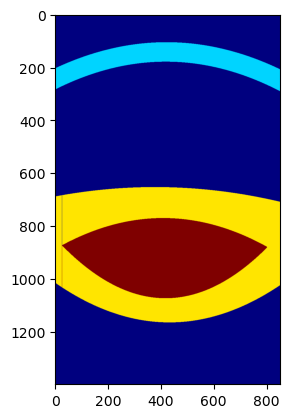

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

H, W = 4096, 850

data_root ="/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data" 

segmentation = np.fromfile(data_root + "/CN043_DJ_18_M/OD/6-0D/4/Horizontal/Segmentation.bin", dtype = np.uint8)

# print('unique values in segmentation:', np.unique(segmentation, return_counts = True))

segmentation = segmentation[:H*W].reshape(W, H).T
segmentation = segmentation[:1400, :850]

binary_image = (segmentation == 255).astype(np.uint8)
# print('unique values in binary_image:', np.unique(binary_image, return_counts = True))

height, width = binary_image.shape
print('height, width:', height, width)
mask = np.zeros((height, width), np.uint8)
print('unique values in mask:', np.unique(mask, return_counts = True))
# ---- Layer pairs for segmentation ----
layer_pairs = {
    1 :(2, 3),  # Cornea
    2 :(4, 7),  # Lens
    3 :(5, 6)   # Nucleus
}

all_layers = [np.sort(np.where(binary_image[:, x] ==1)[0]) for x in range(width)]

def compute_x_range(layer_index):
    first_200 = [(x, all_layers[x][layer_index]) for x in range(min(200, width)) if len(all_layers[x]) > layer_index]
    last_200 = [(x, all_layers[x][layer_index]) for x in range(max(width-200, 0), width) if len(all_layers[x]) > layer_index]

    x_start = max(first_200, key=lambda item: item[1])[0] if first_200 else 0
    x_end = max(last_200, key=lambda item: item[1])[0] if last_200 else 0

    return x_start, x_end

x5_start, x5_end = compute_x_range(4) # 5th layer (nucleus top

for x in range(width):
    ys = all_layers[x]
    if len(ys) == 0:
        continue
    
    for layer_num, (y_start, y_end) in layer_pairs.items():
        if y_start <= len(ys) and y_end <= len(ys):
            y_top, y_bottom = ys[y_start - 1], ys[y_end - 1]

            if layer_num == 3:  # Nucleus
                if x5_start is None or x5_end is None or not (x5_start <= x <= x5_end):
                    continue

            label = cv2.line(mask, (x, y_top), (x, y_bottom), color=layer_num, thickness=1)
            
    # for layer_num, (y_start, y_end) in layer_pairs.items():
    #     if y_start <= len(ys):
    #         y_start_val = ys[y_start - 1]
    #         if y_end <= len(ys):
    #             y_end_val = ys[y_end - 1]
    #         else:
    #             y_end_val = height - 1

    #         if layer_num == 3:  # Nucleus
    #             if x < x5_start:
    #                 y_end_val = ys[4] if len(ys) >= 5 else height - 1
    #             elif x > x5_end:
    #                 y_end_val = ys[4] if len(ys) >= 5 else height - 1

    #         mask2 = cv2.line(mask, (x, y_start_val), (x, y_end_val), color=layer_num, thickness=1)
print('unique values in mask:', np.unique(mask, return_counts = True))
plt.imshow(label, cmap='jet')
plt.show()

# plt.imshow(mask2)
# plt.show()

In [10]:
# Select the region you want to inspect
region = segme[690:800, 0:100]  # rows 620-799, columns 0-49

# Print the raw array
print(region)

# Optional: print as a nicer grid
np.set_printoptions(threshold=2000, linewidth=150)
print(region)

# Optional: count unique values in this region
unique_vals, counts = np.unique(region, return_counts=True)
print("Unique values and counts in this region:", dict(zip(unique_vals, counts)))


[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
Unique values and counts in this region: {np.uint8(0): np.int64(110), np.uint8(2): np.int64(10890)}


y5_start: 874 y5_end: 881
y6_start: 874 y6_end: 882
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Unique classes in segme: (array([0, 1, 2, 3], dtype=uint8), array([749366,  65191, 221839, 153604]))


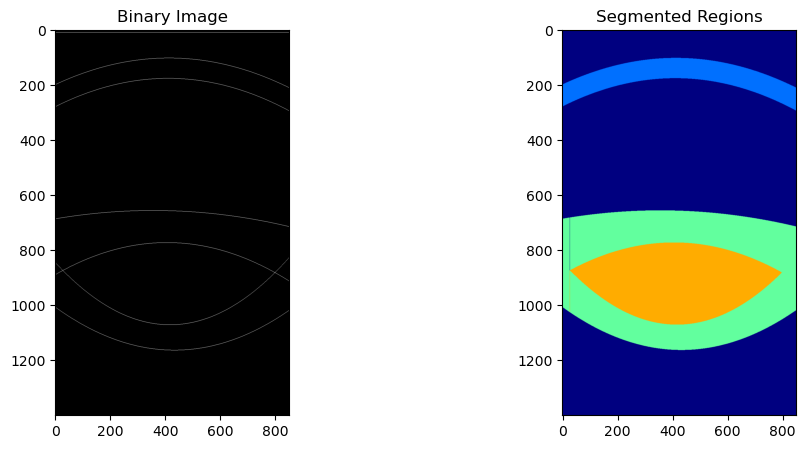

In [46]:
import numpy as np
import cv2

segmentation = np.fromfile(data_root +"/CN043_DJ_18_M/OD/6-0D/6/Horizontal/Segmentation.bin", dtype=np.uint8)
segmentation= segmentation[:H*W].reshape(W, H).T
segmentation =segmentation[:1400, :850] 
binary_img = (segmentation > 225).astype(np.uint8)

segme = np.zeros((1400, W), dtype=np.uint8)

# Example: layer pairs
layer_pairs = {
    1: (2, 3),
    2: (4, 7),
    3: (5, 6)   # special rule
}

# --- Load binary image ---
# binary_img = cv2.imread("binary.png", cv2.IMREAD_GRAYSCALE)
# binary_img = (binary_img > 0).astype(np.uint8)
# H, W = binary_img.shape



# Collect ys for each column
all_layers = []
for x in range(W):
    ys = np.where(binary_img[:, x] == 1)[0]
    all_layers.append(np.sort(ys))

# --- Special handling for layer 5 and 6 ---
# Extract candidate ys for layer 5 and 6
# --- Extract layer 5 and 6 across all columns ---
y5_list = [ys[4] for ys in all_layers if len(ys) >= 5]   # 5th layer
y6_list = [ys[5] for ys in all_layers if len(ys) >= 6]   # 6th layer

# --- First 200 columns ---
first200_range = range(min(200, W))
first200_y5 = [(x, all_layers[x][4]) for x in first200_range if len(all_layers[x]) >= 5]
first200_y6 = [(x, all_layers[x][5]) for x in first200_range if len(all_layers[x]) >= 6]

if first200_y5:
    x5_start, y5_start = max(first200_y5, key=lambda t: t[1])  # max y5
else:
    x5_start, y5_start = None, None

if first200_y6:
    x6_start, y6_start = min(first200_y6, key=lambda t: t[1])  # min y6
else:
    x6_start, y6_start = None, None

# --- Last 200 columns ---
last200_range = range(max(W-200, 0), W)
last200_y5 = [(x, all_layers[x][4]) for x in last200_range if len(all_layers[x]) >= 5]
last200_y6 = [(x, all_layers[x][5]) for x in last200_range if len(all_layers[x]) >= 6]

if last200_y5:
    x5_end, y5_end = max(last200_y5, key=lambda t: t[1])
else:
    x5_end, y5_end = None, None

if last200_y6:
    x6_end, y6_end = min(last200_y6, key=lambda t: t[1])
else:
    x6_end, y6_end = None, None

print("y5_start:", y5_start, "y5_end:", y5_end)
print("y6_start:", y6_start, "y6_end:", y6_end)
# --- Main segmentation loop ---
for x in range(W):
    ys = all_layers[x]
    if len(ys) < 2:
        continue

    for seg_id, (i1, i2) in layer_pairs.items():
        if i1 <= len(ys) and i2 <= len(ys):
            y_top = ys[i1 - 1]
            y_bottom = ys[i2 - 1]

            if seg_id == 3:
                if x5_start is None or x5_end is None:
                    continue  # skip if range not defined
                if x < x5_start or x > x5_end:
                    continue  # skip columns outside horizontal window
        

            segme[y_top:y_bottom, x] = seg_id

print(segme)
# Convert segmentation to color for display
print("Unique classes in segme:", np.unique(segme, return_counts=True))
segmentation_color = cv2.applyColorMap((segme * 60).astype(np.uint8), cv2.COLORMAP_JET)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Binary Image")
plt.imshow(binary_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Segmented Regions")
plt.imshow(segmentation_color[..., ::-1])  # convert BGR to RGB
plt.show()

Segmentation shape: (1400, 850)
x=0, ys=[   8  198  279  686  844  890 1007]
x=1, ys=[   8  198  278  686  845  889 1007]
x=2, ys=[   8  197  278  686  846  888 1008]
x=3, ys=[   8  197  277  686  847  888 1009]
x=4, ys=[   8  196  277  686  849  887 1010]
x=5, ys=[   8  196  276  685  850  887 1010]
x=6, ys=[   8  196  276  685  851  886 1011]
x=7, ys=[   8  195  275  685  852  886 1012]
x=8, ys=[   8  195  275  685  853  885 1012]
x=9, ys=[   8  194  274  685  854  884 1013]
x=10, ys=[   8  194  274  685  855  884 1014]
x=11, ys=[   8  193  273  684  856  883 1015]
x=12, ys=[   8  193  273  684  857  883 1015]
x=13, ys=[   8  192  272  684  858  882 1016]
x=14, ys=[   8  192  272  684  859  882 1017]
x=15, ys=[   8  191  271  684  860  881 1017]
x=16, ys=[   8  191  271  684  861  880 1018]
x=17, ys=[   8  190  270  683  862  880 1019]
x=18, ys=[   8  190  270  683  863  879 1019]
x=19, ys=[   8  190  269  683  864  879 1020]
x=20, ys=[   8  189  269  683  865  878 1021]
x=21, ys=[  

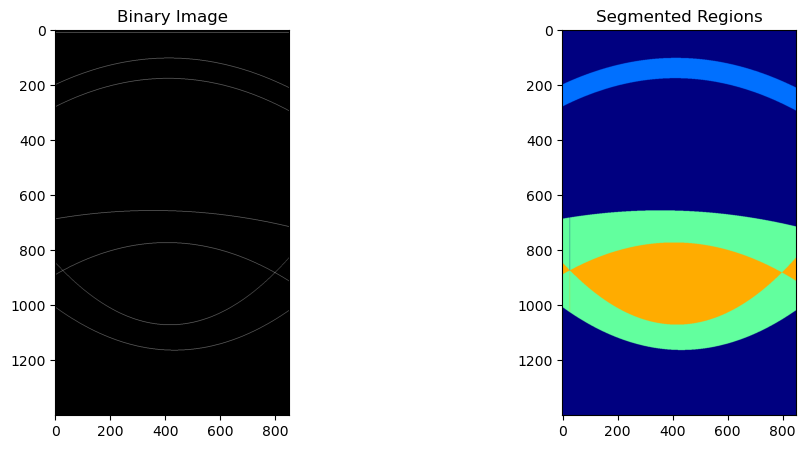

In [36]:
H, W = binary_img.shape

# Output segmentation mask (initialized with 0)
seg_mask = np.zeros((H, W), dtype=np.uint8)
print("Segmentation shape:", seg_mask.shape)

# Define layer pairs for segmentation (1-based index of layer order)
# Example: segment 1 = (1,2), segment 2 = (3,6), segment 3 = (4,5)
layer_pairs = {
    1: (2, 3),
    2: (4, 7),
    3: (5, 6)
}

# Loop over each column
for x in range(W):
    # Find all y where curve exists in this column
    ys = np.where(binary_img[:, x] == 1)[0]
    print(f"x={x}, ys={ys}")
    if len(ys) < 2:
        print(f"x={x}, skipped (only {len(ys)} points)")
        continue  # skip if not enough layers

    # Sort y indices (top to bottom)
    ys_sorted = np.sort(ys)

    # For each defined region, fill the mask
    for seg_id, (i1, i2) in layer_pairs.items():
        if i1 <= len(ys_sorted) and i2 <= len(ys_sorted):
            y_top = ys_sorted[i1 - 1]
            y_bottom = ys_sorted[i2 - 1]
            seg_mask[y_top:y_bottom, x] = seg_id

# --- Visualization ---
# Convert segmentation to color for display
print("Unique classes in seg_mask:", np.unique(seg_mask, return_counts=True))
segmentation_color = cv2.applyColorMap((seg_mask * 60).astype(np.uint8), cv2.COLORMAP_JET)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Binary Image")
plt.imshow(binary_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Segmented Regions")
plt.imshow(segmentation_color[..., ::-1])  # convert BGR to RGB
plt.show()

Unique classes in segme: (array([0, 1, 2, 3], dtype=uint8), array([749514,  65191, 219074, 156221]))


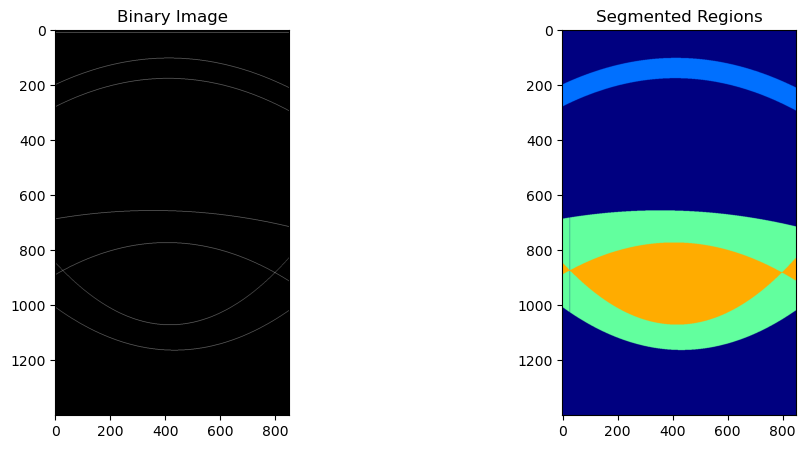

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Example layer pairs
layer_pairs = {
    1: (2, 3),
    2: (4, 7),
    3: (5, 6)   # special rule
}

# --- Load binary image ---
# binary_img = cv2.imread("binary.png", cv2.IMREAD_GRAYSCALE)
# binary_img = (binary_img > 0).astype(np.uint8)
# H, W = binary_img.shape

segme = np.zeros((H, W), dtype=np.uint8)

# Collect ys for each column
all_layers = []
for x in range(W):
    ys = np.where(binary_img[:, x] == 1)[0]
    all_layers.append(np.sort(ys))

# --- Extract y5 and y6 (layer 5 and 6) ---
y5 = np.array([ys[4] if len(ys) >= 5 else np.nan for ys in all_layers])
y6 = np.array([ys[5] if len(ys) >= 6 else np.nan for ys in all_layers])

# --- Use first/last 200 columns to define start/end ---
first200 = slice(0, min(200, W))
last200 = slice(max(W-200, 0), W)

y5_start = np.nanmax(y5[first200]) if np.any(~np.isnan(y5[first200])) else None
y5_end   = np.nanmax(y5[last200]) if np.any(~np.isnan(y5[last200])) else None
y6_start = np.nanmin(y6[first200]) if np.any(~np.isnan(y6[first200])) else None
y6_end   = np.nanmin(y6[last200]) if np.any(~np.isnan(y6[last200])) else None

print("y5_start:", y5_start, "y5_end:", y5_end)
print("y6_start:", y6_start, "y6_end:", y6_end)

# --- Main segmentation loop ---
for x in range(W):
    ys = all_layers[x]
    if len(ys) < 2:
        continue

    for seg_id, (i1, i2) in layer_pairs.items():
        if i1 <= len(ys) and i2 <= len(ys):
            y_top = ys[i1 - 1]
            y_bottom = ys[i2 - 1]

            if seg_id == 3 and (y5_start is not None and y6_start is not None):
                # clip y5 and y6 globally
                if y_top < y5_start:
                    y_top = y5_start
                if y_top > y5_end:
                    continue
                if y_bottom > y6_start:
                    y_bottom = y6_start
                if y_bottom < y6_end:
                    continue

                if y_top >= y_bottom:
                    continue

            segme[y_top:y_bottom, x] = seg_id

# --- Visualization ---
print("Unique classes in segme:", np.unique(segme, return_counts=True))
segmentation_color = cv2.applyColorMap((segme * 60).astype(np.uint8), cv2.COLORMAP_JET)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Binary Image")
plt.imshow(binary_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Segmented Regions")
plt.imshow(segmentation_color[..., ::-1])  # convert BGR to RGB
plt.show()


y5_start: 849 y5_end: 887
y6_start: 960 y6_end: 946
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Unique classes in segme: (array([0, 1, 2, 3], dtype=uint8), array([683424,  65521, 234426, 206629]))


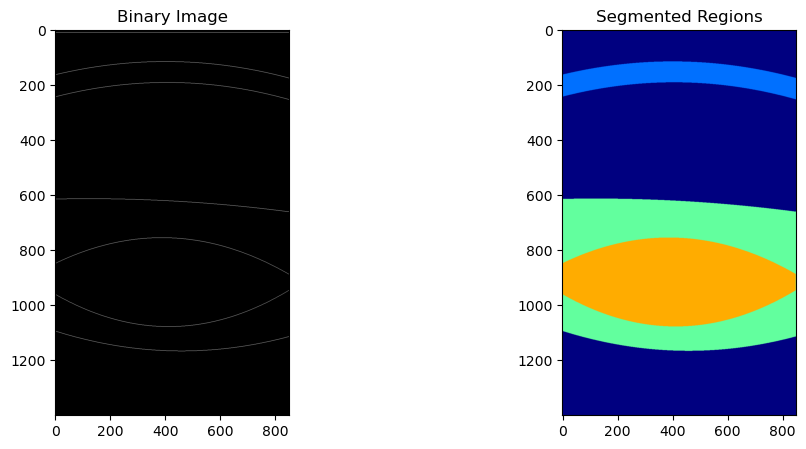

In [44]:
import numpy as np
import cv2

# Example: layer pairs
layer_pairs = {
    1: (2, 3),
    2: (4, 7),
    3: (5, 6)   # special rule
}

# --- Load binary image ---
# binary_img = cv2.imread("binary.png", cv2.IMREAD_GRAYSCALE)
# binary_img = (binary_img > 0).astype(np.uint8)
# H, W = binary_img.shape

segme = np.zeros((1400, W), dtype=np.uint8)

# Collect ys for each column
all_layers = []
for x in range(W):
    ys = np.where(binary_img[:, x] == 1)[0]
    all_layers.append(np.sort(ys))

# --- Special handling for layer 5 and 6 ---
# Extract candidate ys for layer 5 and 6
# --- Extract layer 5 and 6 across all columns ---
y5_list = [ys[4] for ys in all_layers if len(ys) >= 5]   # 5th layer
y6_list = [ys[5] for ys in all_layers if len(ys) >= 6]   # 6th layer

# --- First 200 columns ---
first200_range = range(min(200, W))
first200_y5 = [(x, all_layers[x][4]) for x in first200_range if len(all_layers[x]) >= 5]
first200_y6 = [(x, all_layers[x][5]) for x in first200_range if len(all_layers[x]) >= 6]

if first200_y5:
    x5_start, y5_start = max(first200_y5, key=lambda t: t[1])  # max y5
else:
    x5_start, y5_start = None, None

if first200_y6:
    x6_start, y6_start = min(first200_y6, key=lambda t: t[1])  # min y6
else:
    x6_start, y6_start = None, None

# --- Last 200 columns ---
last200_range = range(max(W-200, 0), W)
last200_y5 = [(x, all_layers[x][4]) for x in last200_range if len(all_layers[x]) >= 5]
last200_y6 = [(x, all_layers[x][5]) for x in last200_range if len(all_layers[x]) >= 6]

if last200_y5:
    x5_end, y5_end = max(last200_y5, key=lambda t: t[1])
else:
    x5_end, y5_end = None, None

if last200_y6:
    x6_end, y6_end = min(last200_y6, key=lambda t: t[1])
else:
    x6_end, y6_end = None, None

print("y5_start:", y5_start, "y5_end:", y5_end)
print("y6_start:", y6_start, "y6_end:", y6_end)
# --- Main segmentation loop ---
for x in range(W):
    ys = all_layers[x]
    if len(ys) < 2:
        continue

    for seg_id, (i1, i2) in layer_pairs.items():
        if i1 <= len(ys) and i2 <= len(ys):
            y_top = ys[i1 - 1]
            y_bottom = ys[i2 - 1]

            if seg_id == 3:
                if x5_start is None or x5_end is None:
                    continue  # skip if range not defined
                if x < x5_start or x > x5_end:
                    continue  # skip columns outside horizontal window
        

            segme[y_top:y_bottom, x] = seg_id

print(segme)
# Convert segmentation to color for display
print("Unique classes in segme:", np.unique(segme, return_counts=True))
segmentation_color = cv2.applyColorMap((segme * 60).astype(np.uint8), cv2.COLORMAP_JET)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Binary Image")
plt.imshow(binary_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Segmented Regions")
plt.imshow(segmentation_color[..., ::-1])  # convert BGR to RGB
plt.show()

Unique classes in segm2: (array([0, 1, 2], dtype=uint8), array([749518,  65191, 375291]))


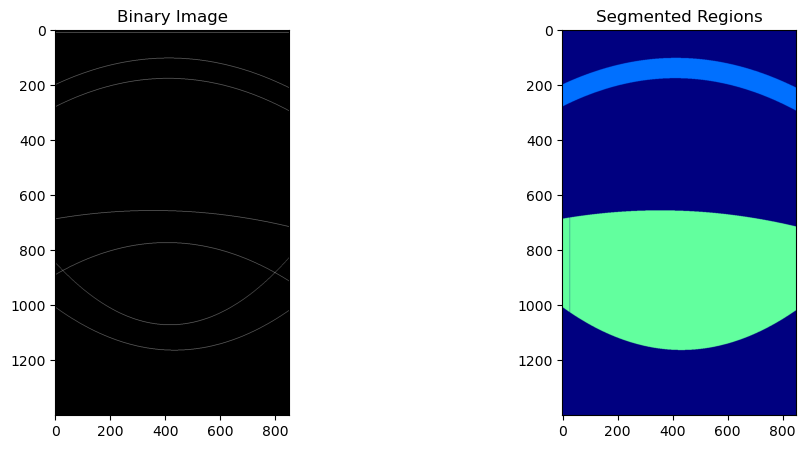

In [2]:
import numpy as np
import cv2

# Example: layer pairs
layer_pairs = {
    1: (2, 3),
    2: (4, 7),
    3: (5, 6)   # special rule
}

# --- Load binary image ---
H, W = binary_img.shape

segm2 = np.zeros((H, W), dtype=np.uint8)

# Collect ys for each column
all_layers = []
for x in range(W):
    ys = np.where(binary_img[:, x] == 1)[0]
    all_layers.append(np.sort(ys))

# --- Special handling for layer 5 and 6 ---
# Extract candidate ys for layer 5 and 6
y5_list = [ys[4] for ys in all_layers if len(ys) >= 5]
y6_list = [ys[5] for ys in all_layers if len(ys) >= 6]

# First 200 columns
first200_y5 = [all_layers[x][4] for x in range(min(200, W)) if len(all_layers[x]) >= 5]
first200_y6 = [all_layers[x][5] for x in range(min(200, W)) if len(all_layers[x]) >= 6]

if first200_y5 and first200_y6:
    y5_start = max(first200_y5)  # y_max
    y6_start = min(first200_y6)  # y_min
else:
    y5_start, y6_start = None, None

# Last 200 columns
last200_y5 = [all_layers[x][4] for x in range(max(W-200, 0), W) if len(all_layers[x]) >= 5]
last200_y6 = [all_layers[x][5] for x in range(max(W-200, 0), W) if len(all_layers[x]) >= 6]

if last200_y5 and last200_y6:
    y5_end = max(last200_y5)
    y6_end = min(last200_y6)
else:
    y5_end, y6_end = None, None

# --- Main segmentation loop ---
for x in range(W):
    ys = all_layers[x]
    if len(ys) < 2:
        continue

    for seg_id, (i1, i2) in layer_pairs.items():
        if i1 <= len(ys) and i2 <= len(ys):
            y_top = ys[i1 - 1]
            y_bottom = ys[i2 - 1]

            if seg_id == 3 and (y5_start is not None and y6_start is not None):
                # If column outside allowed range for (5,6) → assign to segment 2 instead
                if y_top < y5_start or y_top > y5_end or y_bottom > y6_start or y_bottom < y6_end:
                    # Use layer pair 2 (4,7) instead
                    if len(ys) >= 7:
                        y_top = ys[3]   # layer 4
                        y_bottom = ys[6] # layer 7
                        segm2[y_top:y_bottom, x] = 2
                    continue

            segm2[y_top:y_bottom, x] = seg_id

#  Convert segmentation to color for display
print("Unique classes in segm2:", np.unique(segm2, return_counts=True))
segmentation_color = cv2.applyColorMap((segm2 * 60).astype(np.uint8), cv2.COLORMAP_JET)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Binary Image")
plt.imshow(binary_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Segmented Regions")
plt.imshow(segmentation_color[..., ::-1])  # convert BGR to RGB
plt.show()

# working code

Segmentation shape: (1400, 850)
x=0, ys=[   8  301  388  788  937 1000 1109]
x=1, ys=[   8  301  387  788  938  999 1109]
x=2, ys=[   8  300  387  788  939  998 1110]
x=3, ys=[   8  300  386  788  941  998 1111]
x=4, ys=[   8  299  386  788  942  997 1112]
x=5, ys=[   8  299  385  787  943  996 1112]
x=6, ys=[   8  299  385  787  944  996 1113]
x=7, ys=[   8  298  384  787  945  995 1114]
x=8, ys=[   8  298  384  787  946  995 1114]
x=9, ys=[   8  297  383  787  947  994 1115]
x=10, ys=[   8  297  383  787  948  993 1116]
x=11, ys=[   8  296  382  787  949  993 1117]
x=12, ys=[   8  296  382  786  950  992 1117]
x=13, ys=[   8  295  381  786  952  992 1118]
x=14, ys=[   8  295  381  786  953  991 1119]
x=15, ys=[   8  295  380  786  954  991 1119]
x=16, ys=[   8  294  380  786  955  990 1120]
x=17, ys=[   8  294  379  786  956  989 1121]
x=18, ys=[   8  293  379  786  957  989 1122]
x=19, ys=[   8  293  378  785  958  988 1122]
x=20, ys=[   8  292  378  785  959  988 1123]
x=21, ys=[  

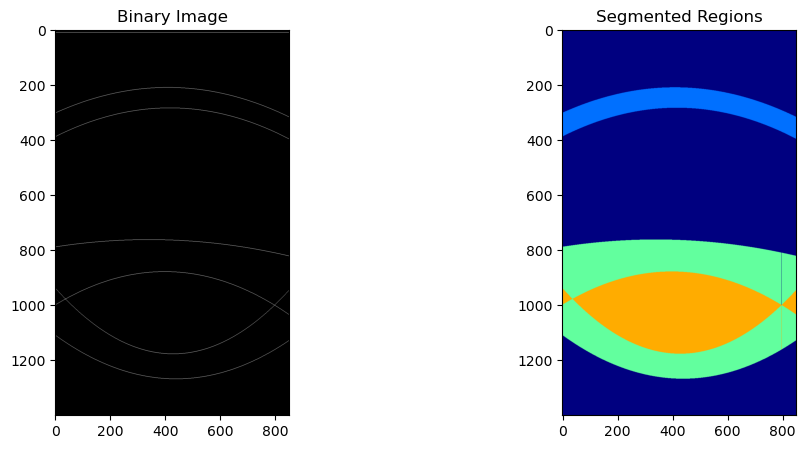

In [10]:
H, W = binary_img.shape

# Output segmentation mask (initialized with 0)
seg_mask = np.zeros((H, W), dtype=np.uint8)
print("Segmentation shape:", seg_mask.shape)

# Define layer pairs for segmentation (1-based index of layer order)
# Example: segment 1 = (1,2), segment 2 = (3,6), segment 3 = (4,5)
layer_pairs = {
    1: (2, 3),
    2: (4, 7),
    3: (5, 6)
}

# Loop over each column
for x in range(W):
    # Find all y where curve exists in this column
    ys = np.where(binary_img[:, x] == 1)[0]
    print(f"x={x}, ys={ys}")
    if len(ys) < 2:
        print(f"x={x}, skipped (only {len(ys)} points)")
        continue  # skip if not enough layers

    # Sort y indices (top to bottom)
    ys_sorted = np.sort(ys)

    # For each defined region, fill the mask
    for seg_id, (i1, i2) in layer_pairs.items():
        if i1 <= len(ys_sorted) and i2 <= len(ys_sorted):
            y_top = ys_sorted[i1 - 1]
            y_bottom = ys_sorted[i2 - 1]
            seg_mask[y_top:y_bottom, x] = seg_id

# --- Visualization ---
# Convert segmentation to color for display
print("Unique classes in seg_mask:", np.unique(seg_mask, return_counts=True))
segmentation_color = cv2.applyColorMap((seg_mask * 60).astype(np.uint8), cv2.COLORMAP_JET)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Binary Image")
plt.imshow(binary_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Segmented Regions")
plt.imshow(segmentation_color[..., ::-1])  # convert BGR to RGB
plt.show()

Segmentation shape: (4096, 850) dtype: uint8 unique classes: [  0   3  16  82 255]
Detected 10 layer segments (1400, 850), int32,
 labels: [ 0  1  2  3  4  5  6  7  8  9 10]  
Layer 1: extracted 850 boundary points
Layer 2: extracted 850 boundary points
Layer 3: extracted 850 boundary points
Layer 4: extracted 850 boundary points
Layer 5: extracted 850 boundary points
Layer 10: extracted 850 boundary points


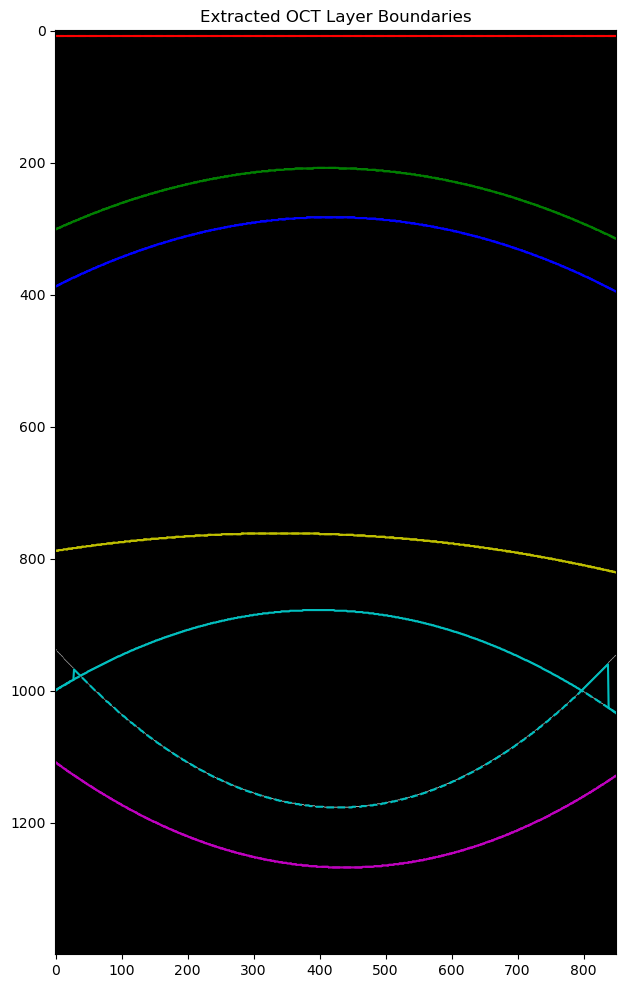

In [40]:
H, W = 4096, 850
data_root = "/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data"  # root dataset folder
png_img = cv2.imread(data_root +"/CN055_LS_42_M/OD/0-6/0/Horizontal/Image.png", cv2.IMREAD_UNCHANGED)

segmentation = np.fromfile(data_root +"/CN043_DJ_18_M/OD/6-0D/2/Horizontal/Segmentation.bin", dtype=np.uint8)
segmentation= segmentation[:H*W].reshape(W, H).T
print("Segmentation shape:", segmentation.shape, "dtype:", segmentation.dtype,
      "unique classes:", np.unique(segmentation))
segmentation =segmentation[:1400, :850]  # crop to region of interest

binary_img = (segmentation > 225).astype(np.uint8)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 1))
# binary_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
# Find connected components (each continuous layer)
num_labels, labels = cv2.connectedComponents(binary_img)
print(f"Detected {num_labels-1} layer segments {labels.shape}, "
      f"{labels.dtype},\n labels: {np.unique(labels)}  ")

# ===========================================
layer_curves = []  # store curves for each layer

for label in range(1, num_labels):  # skip background (0)
    coords = np.column_stack(np.where(labels == label))  # (y, x)
    x_coords = np.unique(coords[:,1])  # all columns for this region
    
    if len(x_coords) < 840:  # ignore small/short components
        continue
  
    top_curve = []
    bottom_curve = []
    
    for x in x_coords:
        y_vals = coords[coords[:,1] == x][:,0]  # all y in this column
        top_curve.append((x, y_vals.min()))
        bottom_curve.append((x, y_vals.max()))
    
    layer_curves.append((top_curve, bottom_curve))
    print(f"Layer {label}: extracted {len(x_coords)} boundary points")
# ====================================================
# layer_info = []
# for label in range(1, num_labels):
#     coords = np.column_stack(np.where(labels == label))
#     centroid_y = coords[:,0].mean()
#     layer_info.append((label, centroid_y))

# # Sort by vertical position (top to bottom)
# layer_info.sort(key=lambda x: x[1])

# print("Layer order (top to bottom):")
# for i, (label, cy) in enumerate(layer_info, 1):
#     print(f"Layer {i}: Label={label}, centroid_y={cy:.1f}")

# =================================================
# Visualize layers with different colors
plt.figure(figsize=(8, 12))
plt.imshow(binary_img, cmap='gray')

colors = ['r','g','b','y','c','m']  # cycle colors for layers
for i, (top, bottom) in enumerate(layer_curves):
    color = colors[i % len(colors)]
    plt.plot([p[0] for p in top], [p[1] for p in top], color+'-', linewidth=1.5, label=f'Layer {i+1} Top')
    plt.plot([p[0] for p in bottom], [p[1] for p in bottom], color+'--', linewidth=1.5, label=f'Layer {i+1} Bottom')

# plt.legend()
plt.title("Extracted OCT Layer Boundaries")
plt.show()


Detected 8 contours
Processing contour 0: 1698 points
Contour 0: extracted boundaries with 850 points
Processing contour 6: 1748 points
Contour 6: extracted boundaries with 850 points
Processing contour 7: 1698 points
Contour 7: extracted boundaries with 850 points


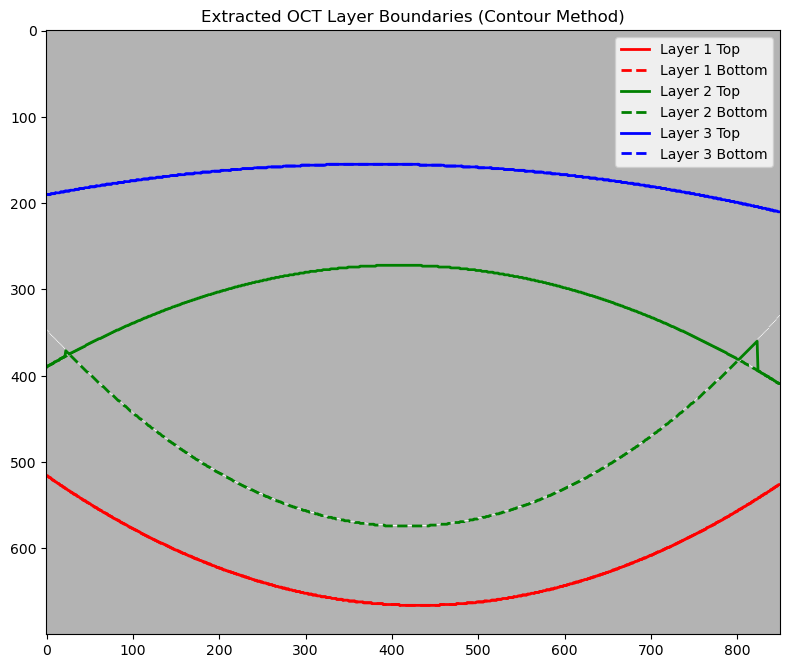

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

H, W = 4096, 850
data_root = "/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data"

segmentation = np.fromfile(data_root + "/CN043_DJ_18_M/OD/6-0D/4/Horizontal/Segmentation.bin", 
                          dtype=np.uint8)
segmentation = segmentation[:H*W].reshape(W, H).T
segmentation = segmentation[500:1200, :850]

binary_img = (segmentation > 225).astype(np.uint8)

# Find all contours
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(f"Detected {len(contours)} contours")

layer_curves = []

for idx, contour in enumerate(contours):
    # Filter small contours
    if len(contour) < 840:
        continue
    
    print(f"Processing contour {idx}: {len(contour)} points")
    
    # Get bounding box to determine contour extent
    x_min = contour[:, 0, 0].min()
    x_max = contour[:, 0, 0].max()
    x_range = range(x_min, x_max + 1)
    
    # Extract top and bottom boundaries
    top_curve = []
    bottom_curve = []
    
    for x in x_range:
        # Find all y-values for this x coordinate in the contour
        mask = contour[:, 0, 0] == x
        if mask.any():
            y_vals = contour[mask, 0, 1]
            top_curve.append((x, y_vals.min()))
            bottom_curve.append((x, y_vals.max()))
    
    if len(top_curve) >= 840:  # Ensure sufficient coverage
        layer_curves.append((top_curve, bottom_curve))
        print(f"Contour {idx}: extracted boundaries with {len(top_curve)} points")

# ============================================
# Visualization
plt.figure(figsize=(8, 12))
plt.imshow(binary_img, cmap='gray', alpha=0.3)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i, (top, bottom) in enumerate(layer_curves):
    color = colors[i % len(colors)]
    plt.plot([p[0] for p in top], [p[1] for p in top], 
            color + '-', linewidth=2, label=f'Layer {i+1} Top')
    plt.plot([p[0] for p in bottom], [p[1] for p in bottom], 
            color + '--', linewidth=2, label=f'Layer {i+1} Bottom')

plt.legend()
plt.title("Extracted OCT Layer Boundaries (Contour Method)")
plt.tight_layout()
plt.show()

Segmentation shape: (4096, 850) dtype: uint8 unique classes: [  0   3  16  82 255]
Extracting boundaries with gap detection...
Upper layer: 850 points
Lower layer: 850 points

Detected 2 layer(s)


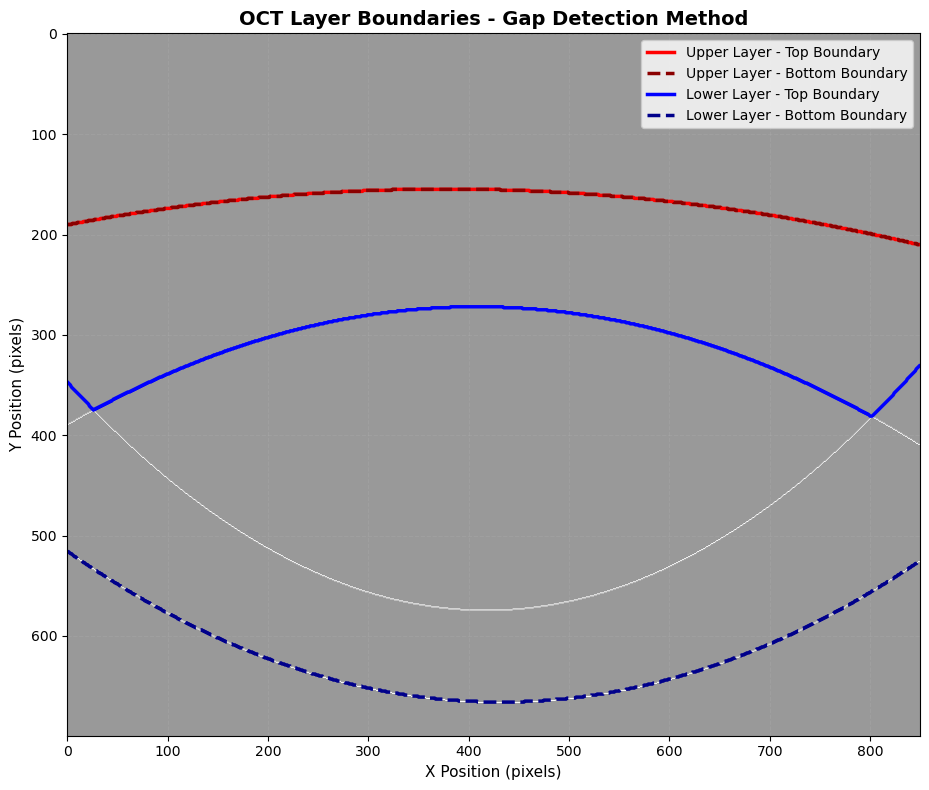


Extracted Boundary Data:

Upper Layer:
  Top boundary: 850 points
  Bottom boundary: 850 points
  Y range (top): 155.0 to 210.0
  Y range (bottom): 155.0 to 210.0

Lower Layer:
  Top boundary: 850 points
  Bottom boundary: 850 points
  Y range (top): 272.0 to 381.0
  Y range (bottom): 516.0 to 666.0


In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

H, W = 4096, 850
data_root = "/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data"

segmentation = np.fromfile(data_root + "/CN043_DJ_18_M/OD/6-0D/4/Horizontal/Segmentation.bin", 
                          dtype=np.uint8)
segmentation = segmentation[:H*W].reshape(W, H).T
print("Segmentation shape:", segmentation.shape, "dtype:", segmentation.dtype,
      "unique classes:", np.unique(segmentation))

segmentation = segmentation[500:1200, :850]  # crop to region of interest
binary_img = (segmentation > 225).astype(np.uint8)

# ============================================
# Solution 4: Vertical Scanning with Gap Detection
# ============================================

def extract_boundaries_with_gap_detection(binary_img, min_gap=1, min_points=840):
    """
    Extract separate upper and lower boundaries even when they touch/intersect.
    
    Parameters:
    -----------
    binary_img : np.ndarray
        Binary image with white regions (layers)
    min_gap : int
        Minimum vertical gap (in pixels) to consider regions as separate
    min_points : int
        Minimum number of points required for a valid boundary
    
    Returns:
    --------
    list of tuples : [(upper_top, upper_bottom), (lower_top, lower_bottom), ...]
    """
    h, w = binary_img.shape
    
    # Storage for different layers/regions
    upper_top = []
    upper_bottom = []
    lower_top = []
    lower_bottom = []
    
    for x in range(w):
        col = binary_img[:, x]
        white_pixels = np.where(col > 0)[0]
        
        if len(white_pixels) == 0:
            continue
        
        # Find gaps in the column
        if len(white_pixels) > 1:
            gaps = np.diff(white_pixels)
            large_gap_indices = np.where(gaps > min_gap)[0]
        else:
            large_gap_indices = np.array([])
        
        if len(large_gap_indices) > 0:
            # We have separated regions - split into upper and lower
            split_idx = large_gap_indices[0]  # Take first major gap
            upper_region = white_pixels[:split_idx+1]
            lower_region = white_pixels[split_idx+1:]
            
            # Upper region boundaries
            upper_top.append((x, upper_region[0]))      # top of upper
            upper_bottom.append((x, upper_region[-1]))  # bottom of upper
            
            # Lower region boundaries
            lower_top.append((x, lower_region[0]))      # top of lower
            lower_bottom.append((x, lower_region[-1]))  # bottom of lower
            
        else:
            # Single continuous region (no gap) - treat as single layer
            upper_top.append((x, white_pixels[0]))
            upper_bottom.append((x, white_pixels[-1]))
    
    # Organize results
    boundaries = []
    
    # Add upper layer if it has enough points
    if len(upper_top) >= min_points:
        boundaries.append(('Upper Layer', upper_top, upper_bottom))
        print(f"Upper layer: {len(upper_top)} points")
    
    # Add lower layer if it has enough points
    if len(lower_top) >= min_points:
        boundaries.append(('Lower Layer', lower_top, lower_bottom))
        print(f"Lower layer: {len(lower_top)} points")
    
    return boundaries

# Extract boundaries
print("Extracting boundaries with gap detection...")
layer_boundaries = extract_boundaries_with_gap_detection(
    binary_img, 
    min_gap=0,      # Adjust this based on your data (smaller = more sensitive)
    min_points=840  # Minimum horizontal coverage required
)

print(f"\nDetected {len(layer_boundaries)} layer(s)")

# ============================================
# Visualization
# ============================================
plt.figure(figsize=(12, 8))

# Show binary image as background
plt.imshow(binary_img, cmap='gray', alpha=0.4)

# Plot boundaries with different colors
colors = [('red', 'darkred'), ('blue', 'darkblue'), ('green', 'darkgreen')]

for i, (layer_name, top_curve, bottom_curve) in enumerate(layer_boundaries):
    color_top, color_bottom = colors[i % len(colors)]
    
    # Extract coordinates
    x_top = [p[0] for p in top_curve]
    y_top = [p[1] for p in top_curve]
    x_bottom = [p[0] for p in bottom_curve]
    y_bottom = [p[1] for p in bottom_curve]
    
    # Plot curves
    plt.plot(x_top, y_top, color=color_top, linewidth=2.5, 
            label=f'{layer_name} - Top Boundary', linestyle='-')
    plt.plot(x_bottom, y_bottom, color=color_bottom, linewidth=2.5, 
            label=f'{layer_name} - Bottom Boundary', linestyle='--')

plt.legend(loc='upper right', fontsize=10)
plt.title("OCT Layer Boundaries - Gap Detection Method", fontsize=14, fontweight='bold')
plt.xlabel("X Position (pixels)", fontsize=11)
plt.ylabel("Y Position (pixels)", fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ============================================
# Optional: Export boundaries to arrays
# ============================================
print("\n" + "="*50)
print("Extracted Boundary Data:")
print("="*50)

for layer_name, top_curve, bottom_curve in layer_boundaries:
    print(f"\n{layer_name}:")
    print(f"  Top boundary: {len(top_curve)} points")
    print(f"  Bottom boundary: {len(bottom_curve)} points")
    
    # Convert to numpy arrays for further processing
    top_array = np.array(top_curve)
    bottom_array = np.array(bottom_curve)
    
    print(f"  Y range (top): {top_array[:, 1].min():.1f} to {top_array[:, 1].max():.1f}")
    print(f"  Y range (bottom): {bottom_array[:, 1].min():.1f} to {bottom_array[:, 1].max():.1f}")

In [69]:
layer_curves = []  # store curves for each layer

for label in range(1, num_labels):  # skip background (0)
    coords = np.column_stack(np.where(labels == label))  # (y, x)
    x_coords = np.unique(coords[:, 1])  # all columns for this region
    
    if len(x_coords) < 800:  # ignore small/short components
        # print(f"Layer {label}: ignored (only {len(x_coords)} points)")
        continue
    
    top_curve = []
    bottom_curve = []
    
    for x in x_coords:
        y_vals = coords[coords[:, 1] == x][:, 0]  # all y in this column
        top_curve.append((x, y_vals.min()))
        bottom_curve.append((x, y_vals.max()))
    
    layer_curves.append((top_curve, bottom_curve))
    print(f"Layer {label}: extracted {len(x_coords)} boundary points")


Layer 1: extracted 850 boundary points
Layer 2: extracted 850 boundary points
Layer 8: extracted 850 boundary points


Color for label 1: [ 95 179  61]


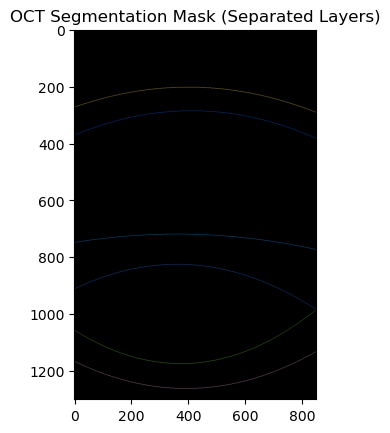

In [19]:
# Random color map for each class
np.random.seed(42)  # reproducibility
colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

# Build RGB mask
seg_rgb = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)
for label in range(1, num_labels):  # skip background
    if label == 1:
        print(f"Color for label {label}: {colors[label]}")
    else:
        seg_rgb[labels == label] = colors[label]

# plt.figure(figsize=(8, 12))
plt.imshow(seg_rgb[:1300, :850])  # Show a zoomed-in region
plt.title("OCT Segmentation Mask (Separated Layers)")
# plt.axis("off")
plt.show()


In [43]:
layer_info = []
for label in range(1, num_labels):
    coords = np.column_stack(np.where(labels == label))
    centroid_y = coords[:,0].mean()
    layer_info.append((label, centroid_y))

# Sort by vertical position (top to bottom)
layer_info.sort(key=lambda x: x[1])

print("Layer order (top to bottom):")
for i, (label, cy) in enumerate(layer_info, 1):
    print(f"Layer {i}: Label={label}, centroid_y={cy:.1f}")


Layer order (top to bottom):
Layer 1: Label=1, centroid_y=8.0
Layer 2: Label=2, centroid_y=124.1
Layer 3: Label=3, centroid_y=205.4
Layer 4: Label=4, centroid_y=562.5
Layer 5: Label=5, centroid_y=861.1
Layer 6: Label=6, centroid_y=1149.5
Layer 7: Label=7, centroid_y=3319.0


Segmentation shape: (4096, 850) dtype: uint8 unique classes: [  0   3  16  82 255]
Detected 11 layer segments (1400, 850), int32, labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Layer 1: extracted 850 boundary points
Layer 2: extracted 850 boundary points
Layer 3: extracted 850 boundary points
Layer 4: extracted 850 boundary points
Layer 5: extracted 850 boundary points
Layer 6: extracted 4 boundary points
Layer 7: extracted 9 boundary points
Layer 8: extracted 4 boundary points
Layer 9: extracted 13 boundary points
Layer 10: extracted 18 boundary points
Layer 11: extracted 850 boundary points


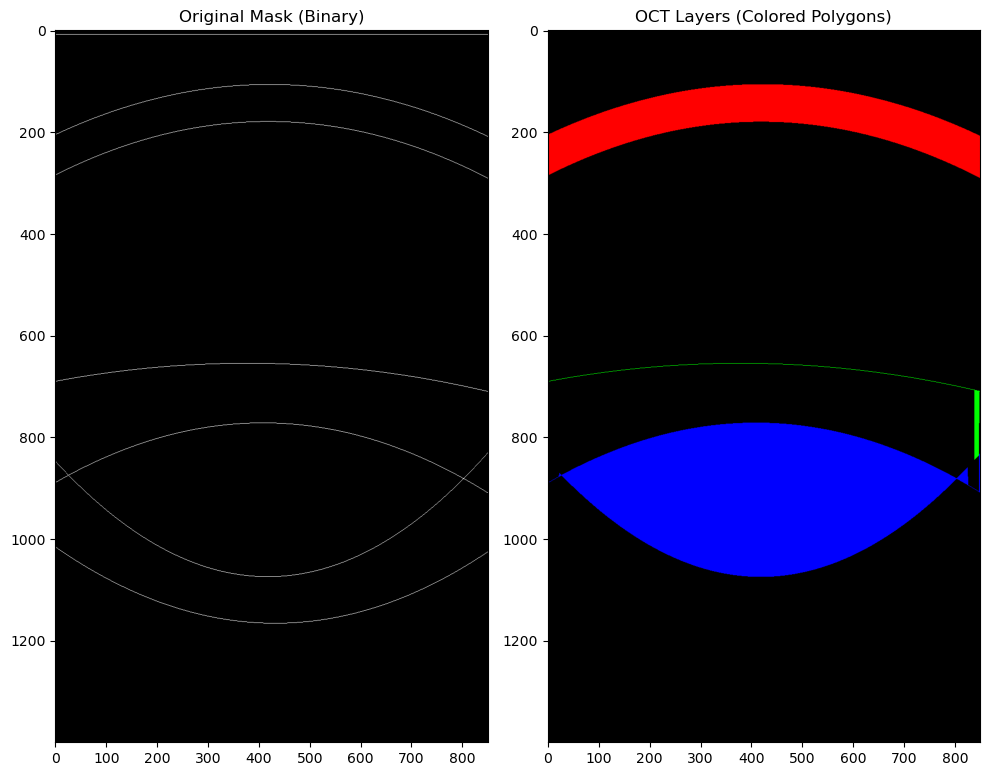

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Connected Components ---
H, W = 4096, 850
data_root = "/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data"

segmentation = np.fromfile(data_root + "/CN043_DJ_18_M/OD/6-0D/4/Horizontal/Segmentation.bin", 
                          dtype=np.uint8)
segmentation = segmentation[:H*W].reshape(W, H).T
print("Segmentation shape:", segmentation.shape, "dtype:", segmentation.dtype,
      "unique classes:", np.unique(segmentation))

segmentation = segmentation[:1400, :850]  # crop to region of interest
binary_img = (segmentation > 225).astype(np.uint8)

num_labels, labels = cv2.connectedComponents(binary_img)
print(f"Detected {num_labels-1} layer segments {labels.shape}, "
      f"{labels.dtype}, labels: {np.unique(labels)}")

layer_curves = {}  # store curves for each layer (dict with label as key)

for label in range(1, num_labels):  # skip background (0)
    coords = np.column_stack(np.where(labels == label))  # (y, x)
    x_coords = np.unique(coords[:,1])  # all columns for this region
    
    top_curve = []
    bottom_curve = []
    
    for x in x_coords:
        y_vals = coords[coords[:,1] == x][:,0]  # all y in this column
        top_curve.append((x, y_vals.min()))
        bottom_curve.append((x, y_vals.max()))
    
    layer_curves[label] = (top_curve, bottom_curve)
    print(f"Layer {label}: extracted {len(x_coords)} boundary points")

# --- Step 2: Map Labels to Anatomical Structures ---
regions_map = {
    "Cornea":   [2, 3],
    "Lens":     [4, 7],
    "Nucleus":  [5, 6],
    # "Retina":   [7],
}

# --- Step 3: Build Polygons ---
polygons = {}
for name, label_list in regions_map.items():
    top_curve = []
    bottom_curve = []
    for lbl in label_list:
        if lbl in layer_curves:
            t, b = layer_curves[lbl]
            top_curve.extend(t)
            bottom_curve.extend(b)
    
    # Sort by x so polygon is not scrambled
    top_curve = sorted(top_curve, key=lambda p: p[0])
    bottom_curve = sorted(bottom_curve, key=lambda p: p[0])
    
    if len(top_curve) > 0 and len(bottom_curve) > 0:
        polygon = np.array(top_curve + bottom_curve[::-1], dtype=np.int32)
        polygons[name] = polygon
    else:
        print(f"Warning: No curves found for {name}")

# --- Step 4: Fill Colors ---
colored_mask = np.zeros((*segmentation.shape, 3), dtype=np.uint8)

colors = {
    "Cornea":  (255, 0, 0),     # Blue
    "Lens":    (0, 255, 0),     # Green
    "Nucleus": (0, 0, 255),     # Red
    "Retina":  (255, 255, 0),   # Cyan
}

for name, polygon in polygons.items():
    if polygon.shape[0] > 0:
        cv2.fillPoly(colored_mask, [polygon], colors[name])
    else:
        print(f"Skipping {name}, polygon empty")

# --- Step 5: Plot Results ---
plt.figure(figsize=(10, 12))

plt.subplot(1, 2, 1)
plt.title("Original Mask (Binary)")
plt.imshow(binary_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("OCT Layers (Colored Polygons)")
plt.imshow(colored_mask)

plt.tight_layout()
plt.show()


In [49]:
import os
import cv2
import numpy as np
from glob import glob
from tqdm import tqdm

print("current working dir:", os.getcwd())

resize = True
# --- Paths ---
data_root = "/media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/Training Data"  # root dataset folder
save_images = data_root + "/dataset/images"
save_labels = data_root + "/dataset/labels"
save_visual = data_root + "/dataset/visual"
os.makedirs(save_images, exist_ok=True)
os.makedirs(save_labels, exist_ok=True)
os.makedirs(save_visual, exist_ok=True)

# --- Class IDs (for DL training) ---
class_ids = {
    "Cornea": 1,
    "Lens": 2,
    "Nucleus": 3,
    # "Retina": 4,   # enable if needed
}

# --- Colors (for visualization only) ---
colors = {
    "Cornea":  (255, 0, 0),     # Blue
    "Lens":    (0, 255, 0),     # Green
    "Nucleus": (0, 0, 255),     # Red
    "Retina":  (255, 255, 0),   # Cyan
}

# --- Simple polygon builder (fills entire band) ---
def build_band_polygon(seg, row_start, row_end):
    """Return polygon covering full region between row_start and row_end"""
    h = seg.shape[1]  # number of columns
    top_curve = [(col, row_start) for col in range(h)]
    bottom_curve = [(col, row_end) for col in range(h)]
    return np.array(top_curve + bottom_curve[::-1], dtype=np.int32)

# --- Resize with padding (helper) ---
def resize_with_padding(img, target_size=(512, 512)):
    h, w = img.shape[:2]
    th, tw = target_size
    scale = min(tw / w, th / h)
    nh, nw = int(h * scale), int(w * scale)
    resized = cv2.resize(img, (nw, nh), interpolation=cv2.INTER_NEAREST)
    new_img = np.zeros((th, tw) + img.shape[2:], dtype=img.dtype) if img.ndim == 3 else np.zeros((th, tw), dtype=img.dtype)
    top = (th - nh) // 2
    left = (tw - nw) // 2
    new_img[top:top+nh, left:left+nw] = resized
    return new_img

# --- Traverse dataset ---
subfolders = ["0-6D", "6-0D"]

for group in subfolders:
    group_path = os.path.join(data_root + '/CN030_BA_19_M/OD', group)
    frames = sorted(os.listdir(group_path))
    
    for frame in tqdm(frames, desc=f"Processing {group}"):
        frame_path = os.path.join(group_path, frame)
        orientations = ["Horizontal", "Vertical"]
        
        for ori in orientations:
            img_path = os.path.join(frame_path, ori, "Image.png")
            seg_path = os.path.join(frame_path, ori, "Segmentation.bin")
            
            if not (os.path.exists(img_path) and os.path.exists(seg_path)):
                print(f"Skipping missing files: {img_path}")
                continue
            
            # --- Load image and segmentation ---
            png_img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            seg = np.fromfile(seg_path, dtype=np.uint8)
            seg = seg[:4096*850].reshape(850, 4096).T  # reshape to (4096, 850)
            
            # Crop the image and segmentation to (1250, 850)
            png_img = png_img[:1250, :850]
            seg = seg[:1250, :850]
            mask_255 = (seg == 255).astype(np.uint8)
            
            # --- Detect continuous 255 segments ---
            vertical_profile = mask_255.sum(axis=1)
            rows_with_255 = np.where(vertical_profile > 0)[0]
            segments = []
            start = rows_with_255[0]
            for i in range(1, len(rows_with_255)):
                if rows_with_255[i] != rows_with_255[i-1] + 1:
                    segments.append((start, rows_with_255[i-1]))
                    start = rows_with_255[i]
            segments.append((start, rows_with_255[-1]))
            
            # --- Define regions (whole bands, not separate inner/outer) ---
            regions = {
                "Cornea":  (segments[1][0], segments[2][1]),
                "Lens":    (segments[3][0], segments[6][1]),
                "Nucleus": (segments[4][0], segments[5][1]),
                # "Retina":  (segments[7][0]-1, segments[7][1]+1),
            }
            
            # --- Build label mask ---
            label_mask = np.zeros(seg.shape, dtype=np.uint8)
            color_mask = np.zeros((*seg.shape, 3), dtype=np.uint8)
            for name, bounds in regions.items():
                polygon = build_band_polygon(seg, *bounds)
                if polygon.shape[0] > 0:
                    cv2.fillPoly(label_mask, [polygon], class_ids[name])
                    cv2.fillPoly(color_mask, [polygon], colors[name])
            
            # --- Save images and labels with unique name ---
            frame_number = frame.replace("D", "d")  # optional standardization
            filename = f"{group}_{frame_number}_{ori.lower()}"
            if resize:
                png_img = resize_with_padding(png_img, target_size=(512, 512))
                label_mask = resize_with_padding(label_mask, target_size=(512, 512))
                color_mask = resize_with_padding(color_mask, target_size=(512, 512))

            cv2.imwrite(os.path.join(save_images, f"{filename}_image.png"), png_img)
            cv2.imwrite(os.path.join(save_labels, f"{filename}_label.png"), label_mask)
            np.save(os.path.join(save_labels, f"{filename}_label.npy"), label_mask)
            cv2.imwrite(os.path.join(save_visual, f"{filename}_visual.png"), color_mask)


current working dir: /media/be-light/Data/PG_Gdansk/Torun_secondment/Experiments/data2/OCT_repo/SegOCT_BioLab/notebooks


Processing 0-6D:   0%|          | 0/4 [00:00<?, ?it/s]


IndexError: list index out of range